In [1]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np

In [4]:
fashion_mnist_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
model = Sequential([
                    Conv2D(16, 3, activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(3),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
acc = keras.metrics.SparseCategoricalAccuracy()
mae = keras.metrics.MeanAbsoluteError()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae])

In [8]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [9]:
train_images = train_images / 255.

label: Trouser


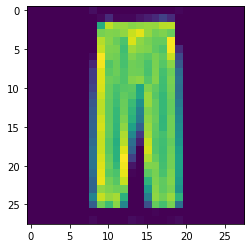

In [10]:
i = 21
img = train_images[i,:,:]
plt.imshow(img)
print('label: {}'.format(labels[train_labels[i]]))

In [11]:
train_images = train_images.reshape(-1, 28, 28, 1)
train_images.shape

(60000, 28, 28, 1)

In [12]:
history = model.fit(train_images, train_labels, epochs=8, batch_size=64)

Epoch 1/8
938/938 [==============================] - 45s 3ms/step - loss: 0.6372 - sparse_categorical_accuracy: 0.6880 - mean_absolute_error: 4.4194
Epoch 2/8
938/938 [==============================] - 2s 3ms/step - loss: 0.3467 - sparse_categorical_accuracy: 0.8398 - mean_absolute_error: 4.4194
Epoch 3/8
938/938 [==============================] - 2s 3ms/step - loss: 0.3196 - sparse_categorical_accuracy: 0.8578 - mean_absolute_error: 4.4214
Epoch 4/8
938/938 [==============================] - 2s 3ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.8674 - mean_absolute_error: 4.4204
Epoch 5/8
938/938 [==============================] - 2s 3ms/step - loss: 0.2838 - sparse_categorical_accuracy: 0.8735 - mean_absolute_error: 4.4202
Epoch 6/8
938/938 [==============================] - 2s 3ms/step - loss: 0.2761 - sparse_categorical_accuracy: 0.8781 - mean_absolute_error: 4.4189
Epoch 7/8
938/938 [==============================] - 2s 3ms/step - loss: 0.2667 - sparse_categorical_accuracy: 

In [13]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.474244,0.773136,4.421196
1,0.344954,0.845668,4.417999
2,0.315086,0.860630,4.421330
3,0.299341,0.869052,4.420506
4,0.287552,0.874704,4.420420


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

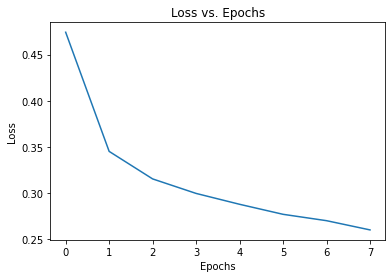

In [14]:
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

In [16]:
test_images = test_images / 255
test_images = test_images.reshape(-1, 28, 28, 1)
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3093 - sparse_categorical_accuracy: 0.8864 - mean_absolute_error: 4.4198


[0.3093433678150177, 0.8864198923110962, 4.4198408126831055]

In [21]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

true label: Ankle Boot
predicted label: Ankle Boot


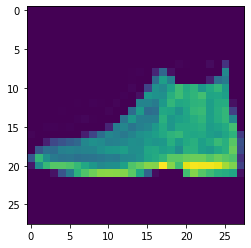

In [28]:
i = 0
img = test_images[i,:,:,:].reshape(28,28)
plt.imshow(img)
print('true label: {}'.format(labels[test_labels[i]]))
print('predicted label: {}'.format(labels[y_pred[i]]))